# Building A Handwritten Digits Classifier

## Introduction

In this project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

## Working With Image Data

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the numpy.reshape() function:

first_image = train.iloc[0]
first_image = first_image.drop('label', axis=1)
np_image = first_image.values
np_image = np_image.reshape(28,28)
Now that the data is in the right shape, we can visualize it using pyplot.imshow() function:

plt.imshow(np_image, cmap='gray_r')
To display multiple images in one matplotlib figure, we can use the equivalent axes.imshow() function.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data, target = load_digits(return_X_y=True)
data = pd.DataFrame(data)
target = pd.Series(target)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Plotting the first image:

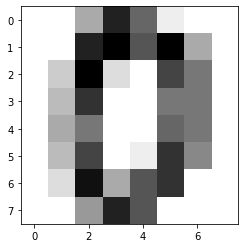

In [3]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

Plotting a scatter plot grid, with 2 rows and 4 columns.

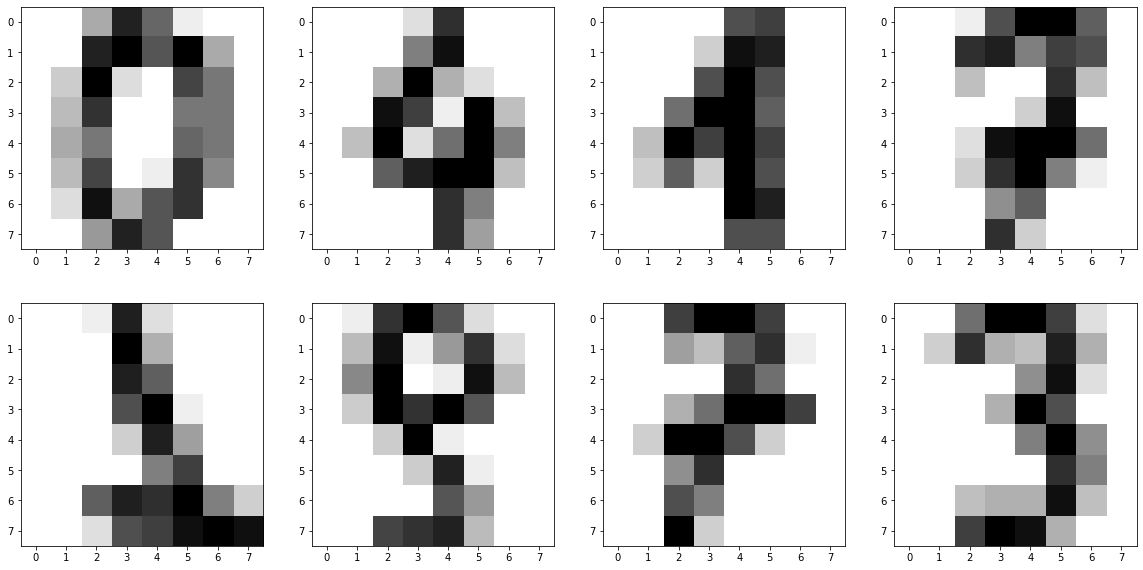

In [4]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
rows = [0, 100, 200, 300, 1000, 1100, 1200, 1300]
plot_num = 1
for row in rows:
    image = data.iloc[row]
    np_image = image.values
    np_image = np_image.reshape(8,8)
    ax = plt.subplot(2,4,plot_num)
    plot_num += 1
    ax.imshow(np_image, cmap='gray_r')

## K-Nearest Neighbors Algorithm

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm makes no such assumption. This allows it to capture nonlinearity in the data.

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that label as the prediction for the unseen observation.

We'll use the KNeighborsClassifier package from SKLearn to train and test k-nearest neighbors models.

### Prepping Train, Test, Cross_Validate Pipeline

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train_knn(num_neighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = num_neighbors)
    knn.fit(train_features, train_labels)
    return knn
    
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    results_df = pd.DataFrame()
    results_df['actual'] = test_labels
    results_df['predicted'] = predictions
    accuracy = sum(results_df['actual']==results_df['predicted'])/len(results_df)
    return accuracy
    
def cross_validate_knn(k, data, target):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = target.loc[train_index], target.loc[test_index]
        
        model = train_knn(k, train_features, train_labels)
        
        train_accuracy = test(model, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    mean_train_accuracies = np.mean(train_accuracies)
    mean_test_accuracies = np.mean(test_accuracies)
    return mean_train_accuracies, mean_test_accuracies

### Testing the Pipeline w/ k=1

In [6]:
mean_train_accuracies, mean_test_accuracies = cross_validate_knn(1, data, target)
print('mean_train_accuracy: ', mean_train_accuracies)
print('mean_test_accuracy: ', mean_test_accuracies)

mean_train_accuracy:  1.0
mean_test_accuracy:  0.9677233358079684


### Finding the Best k Value

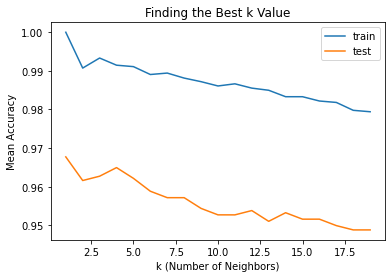

In [7]:
mean_train_accuracies_by_k = []
mean_test_accuracies_by_k = []
for k in range(1,20):
    mean_train_accuracies, mean_test_accuracies = cross_validate_knn(k, data, target)
    mean_train_accuracies_by_k.append(mean_train_accuracies)
    mean_test_accuracies_by_k.append(mean_test_accuracies)
x = range(1,20)
plt.plot(x,mean_train_accuracies_by_k, label='train')
plt.plot(x,mean_test_accuracies_by_k, label='test')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Accuracy')
plt.title('Finding the Best k Value')
plt.legend()
plt.show()

It seems the best k value is 1.

Overall, the K-Nearest-Neighbors Algorithm provided pretty good results (accuracy score: 96.77%).  However, we may have some overfitting here and more importantly, as an algorithm, KNN has a very high memory usage as it needs to be recalculated with each new observation and we don't have a model we can tweak / debug / explore.  

Let's move on to a Neural Network.  We'll start by creating one with one hidden layer.

## Neural Network (1 Hidden Layer)

### Updating Our Pipeline For Neural Networks w/ 1 Hidden Layer

In [8]:
from sklearn.neural_network import MLPClassifier

def train_nn(num_neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = num_neurons)
    mlp.fit(train_features, train_labels)
    return mlp
    
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    results_df = pd.DataFrame()
    results_df['actual'] = test_labels
    results_df['predicted'] = predictions
    accuracy = sum(results_df['actual']==results_df['predicted'])/len(results_df)
    return accuracy
    
def cross_validate_nn(num_neurons, data, target):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = target.loc[train_index], target.loc[test_index]
        
        model = train_nn(num_neurons, train_features, train_labels)
        
        train_accuracy = test(model, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    mean_train_accuracies = np.mean(train_accuracies)
    mean_test_accuracies = np.mean(test_accuracies)
    return mean_train_accuracies, mean_test_accuracies

### Test w/ 8 Neurons

In [9]:
mean_train_accuracies, mean_test_accuracies = cross_validate_nn((8,), data, target)
print('mean_train_accuracy: ', mean_train_accuracies)
print('mean_test_accuracy: ', mean_test_accuracies)

mean_train_accuracy:  0.9502861342603302
mean_test_accuracy:  0.8664377629299679


### Tests w/ 8, 16, 32, 64, 128, 256 Nuerons

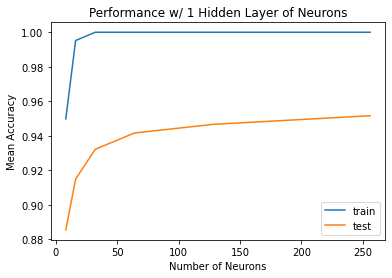

In [10]:
nn_one_layer_neuron_count = [(8,), (16,), (32,), (64,), (128,), (256,)]

mean_train_accuracies_by_num_neurons = []
mean_test_accuracies_by_num_neurons = []
for n in nn_one_layer_neuron_count:
    mean_train_accuracies, mean_test_accuracies = cross_validate_nn(n, data, target)
    mean_train_accuracies_by_num_neurons.append(mean_train_accuracies)
    mean_test_accuracies_by_num_neurons.append(mean_test_accuracies)
x = [8,16,32,64,128,256]
plt.plot(x,mean_train_accuracies_by_num_neurons, label='train')
plt.plot(x,mean_test_accuracies_by_num_neurons, label='test')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Accuracy')
plt.title('Performance w/ 1 Hidden Layer of Neurons')
plt.legend()
plt.show()

These results show that the test accuracy continues to improve as we increase the number of neurons.

Our best model with 1 hidden layer:

In [11]:
mean_train_accuracies, mean_test_accuracies = cross_validate_nn((256,), data, target)
print('mean_train_accuracy: ', mean_train_accuracies)
print('mean_test_accuracy: ', mean_test_accuracies)

mean_train_accuracy:  1.0
mean_test_accuracy:  0.9493603068547389


This best model (w/ 1 hidden layer) doesn't perform quite as well as our KNN algorithm.  Further, because the train data hit's 100% accuracy quickly, it appears that this model is overfitting (at least more than our KNN algorithm did).

Let's try a Neural Network with 2 Hidden Layers and see if we can improve our results.

## Neural Network (2 Hidden Layers)

Our pipeline can remain the same for a Neural Network of 2 Hidden Layers, we just need to adjust the input tuples we're giving to the pipeline.

### Test w/ 8 Neurons in Each Layer

In [12]:
mean_train_accuracies, mean_test_accuracies = cross_validate_nn((8,8), data, target)
print('mean_train_accuracy: ', mean_train_accuracies)
print('mean_test_accuracy: ', mean_test_accuracies)

mean_train_accuracy:  0.9515810494361578
mean_test_accuracy:  0.8369698094531056


### Tests w/ 8, 16, 32, 64, 128, 256 Nuerons in Both Layers

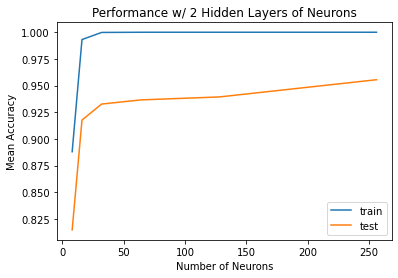

In [13]:
nn_two_layer_neuron_count = [(8,8), (16,16), (32,32), (64,64), (128,128), (256,256)]

mean_train_accuracies_by_num_neurons = []
mean_test_accuracies_by_num_neurons = []
for n in nn_one_layer_neuron_count:
    mean_train_accuracies, mean_test_accuracies = cross_validate_nn(n, data, target)
    mean_train_accuracies_by_num_neurons.append(mean_train_accuracies)
    mean_test_accuracies_by_num_neurons.append(mean_test_accuracies)
x = [8,16,32,64,128,256]
plt.plot(x,mean_train_accuracies_by_num_neurons, label='train')
plt.plot(x,mean_test_accuracies_by_num_neurons, label='test')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Accuracy')
plt.title('Performance w/ 2 Hidden Layers of Neurons')
plt.legend()
plt.show()

Not surprisingly, our best model w/ 2 Hidden Layers is our Model w/ the most neurons in both hidden layers.

In [14]:
mean_train_accuracies, mean_test_accuracies = cross_validate_nn((256,256), data, target)
print('mean_train_accuracy: ', mean_train_accuracies)
print('mean_test_accuracy: ', mean_test_accuracies)

mean_train_accuracy:  1.0
mean_test_accuracy:  0.9560343974263796


This model improved our accuracy by more than 1% from our best model w/ 1 hidden layer.  Let's move on to experimenting with some models with 3 hidden layers.

## Neural Network (3 Hidden Layers)

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, we'll increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

### Updating Our Pipeline to Allow Us to Enter Various n_splits Values

In [15]:
def train_nn(num_neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = num_neurons)
    mlp.fit(train_features, train_labels)
    return mlp
    
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    results_df = pd.DataFrame()
    results_df['actual'] = test_labels
    results_df['predicted'] = predictions
    accuracy = sum(results_df['actual']==results_df['predicted'])/len(results_df)
    return accuracy
    
def cross_validate_nn(num_neurons, data, target, num_folds=4):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=num_folds, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = target.loc[train_index], target.loc[test_index]
        
        model = train_nn(num_neurons, train_features, train_labels)
        
        train_accuracy = test(model, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    mean_train_accuracies = np.mean(train_accuracies)
    mean_test_accuracies = np.mean(test_accuracies)
    return mean_train_accuracies, mean_test_accuracies

### Tests w/ 8, 16, 32, 64, 128, 256 Nuerons in All 3 Layers

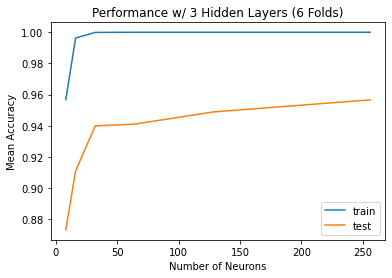

In [16]:
nn_three_layer_neuron_count = [(8,8,8), (16,16,16), (32,32,32), (64,64,64), (128,128,128), (256,256,256)]

mean_train_accuracies_by_num_neurons = []
mean_test_accuracies_by_num_neurons = []
for n in nn_one_layer_neuron_count:
    mean_train_accuracies, mean_test_accuracies = cross_validate_nn(n, data, target, num_folds=6)
    mean_train_accuracies_by_num_neurons.append(mean_train_accuracies)
    mean_test_accuracies_by_num_neurons.append(mean_test_accuracies)
x = [8,16,32,64,128,256]
plt.plot(x,mean_train_accuracies_by_num_neurons, label='train')
plt.plot(x,mean_test_accuracies_by_num_neurons, label='test')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Accuracy')
plt.title('Performance w/ 3 Hidden Layers (6 Folds)')
plt.legend()
plt.show()

Again, our best model w/ 3 Hidden Layers is the one with the most neurons per layer:

In [17]:
mean_train_accuracies, mean_test_accuracies = cross_validate_nn((256,256,256), data, target, num_folds=6)
print('mean_train_accuracy: ', mean_train_accuracies)
print('mean_test_accuracy: ', mean_test_accuracies)

mean_train_accuracy:  1.0
mean_test_accuracy:  0.9649461166852471


Once again, by adding another layer, we've improved our accuracy score by a little over 1%.

## Conclusion

Here are the results of our models:

| Model | Mean Train Accuracy | Mean Test Accuracy |
| :----- | -----: | -----: |
| K-Nearest Neighbors | 100% | 96.77% |
| Neural Network - 1 Hidden Layer | 100% | 94.94% |
| Neural Network - 2 Hidden Layers | 100% | 95.60% |
| **Neural Network - 3 Hidden Layers** | **100%** | **96.49%** |

From these results we can see our Neural Network of 3 Hidden Layers (256 Neurons in each layer) provided our best results (very close to the K-Nearest Neighbors algorithm that we started with).  And with similar results, we prefer using a model we can explore and tweak as needed to an algorithm.

### Next Steps

Here are some next steps we could try:

 * Use the existing pipeline you've built to try other machine learning models:
    * Decision Tree Models
    * Random Forest Models
 * Experiment with different activation functions to see if the accuracies improve.
 * Add a visualization step to our pipeline for visualizing weights in our neural network models.